In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "Java-WebSocket"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([0,1])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 43
Validation buggy code: 11
Train categories: 43
Validation categories: 11


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'NIO', 'OD'}
Unique categories in validation set: {'NIO', 'OD'}


In [9]:
label_to_int= {
    'OD': 0,
    'NIO': 1
}

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Train dataloader length: 6
Validation dataloader length: 2


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

100%|██████████| 43/43 [00:00<00:00, 63.04it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


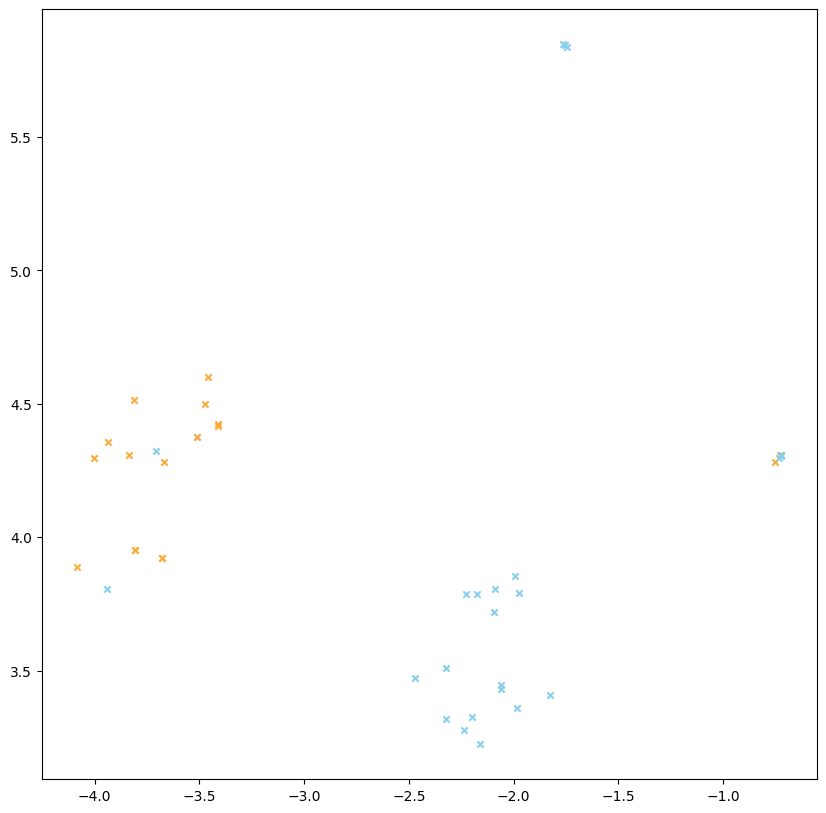

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [21]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 400
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 50%|█████     | 3/6 [00:00<00:00,  9.75it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 11.29it/s]


Epoch 1/400, Loss: 1.0227375427881877


100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch 2/400, Loss: 0.9864073892434438


 17%|█▋        | 1/6 [00:00<00:00,  9.00it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.14it/s]


Epoch 3/400, Loss: 0.9928532242774963


100%|██████████| 6/6 [00:00<00:00, 12.90it/s]


Epoch 4/400, Loss: 0.9963847001393636


100%|██████████| 6/6 [00:00<00:00, 12.09it/s]


Epoch 5/400, Loss: 0.9803852637608846


100%|██████████| 6/6 [00:00<00:00, 12.73it/s]


Epoch 6/400, Loss: 0.9744141499201456


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 7/400, Loss: 0.9915381073951721


100%|██████████| 6/6 [00:00<00:00, 12.17it/s]


Epoch 8/400, Loss: 1.0057838956514995


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 9/400, Loss: 0.9630078176657358


100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch 10/400, Loss: 1.0222891469796498


100%|██████████| 6/6 [00:00<00:00, 12.03it/s]


Epoch 11/400, Loss: 0.9913875361283621


100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch 12/400, Loss: 0.9816293319066366


 33%|███▎      | 2/6 [00:00<00:00, 11.41it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 13/400, Loss: 0.966429223616918


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 14/400, Loss: 0.9841368993123373


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 15/400, Loss: 0.9875391721725464


100%|██████████| 6/6 [00:00<00:00, 11.91it/s]


Epoch 16/400, Loss: 1.010928452014923


100%|██████████| 6/6 [00:00<00:00, 13.01it/s]


Epoch 17/400, Loss: 0.99807741244634


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 18/400, Loss: 0.9853351513544718


100%|██████████| 6/6 [00:00<00:00, 12.72it/s]


Epoch 19/400, Loss: 0.9539440174897512


100%|██████████| 6/6 [00:00<00:00, 12.12it/s]


Epoch 20/400, Loss: 1.0140480697154999


100%|██████████| 6/6 [00:00<00:00, 12.81it/s]


Epoch 21/400, Loss: 0.9783576925595602


100%|██████████| 6/6 [00:00<00:00, 12.24it/s]


Epoch 22/400, Loss: 0.9630014300346375


100%|██████████| 6/6 [00:00<00:00, 12.28it/s]


Epoch 23/400, Loss: 0.9599869747956594


100%|██████████| 6/6 [00:00<00:00, 12.29it/s]


Epoch 24/400, Loss: 1.014794925848643


100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch 25/400, Loss: 0.9496447344621023


100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch 26/400, Loss: 0.9456609586874644


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 27/400, Loss: 0.9477891027927399


100%|██████████| 6/6 [00:00<00:00, 12.00it/s]


Epoch 28/400, Loss: 0.9659525056680044


100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch 29/400, Loss: 0.9357592364152273


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 30/400, Loss: 0.9259096483389536


100%|██████████| 6/6 [00:00<00:00, 12.42it/s]


Epoch 31/400, Loss: 0.9101947546005249


100%|██████████| 6/6 [00:00<00:00, 12.49it/s]


Epoch 32/400, Loss: 0.9104845523834229


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 33/400, Loss: 0.9312040011088053


100%|██████████| 6/6 [00:00<00:00, 12.37it/s]


Epoch 34/400, Loss: 0.9370132585366567


100%|██████████| 6/6 [00:00<00:00, 12.86it/s]


Epoch 35/400, Loss: 0.9778475860754648


 33%|███▎      | 2/6 [00:00<00:00, 11.46it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.19it/s]


Epoch 36/400, Loss: 0.8545243839422861


100%|██████████| 6/6 [00:00<00:00, 12.85it/s]


Epoch 37/400, Loss: 0.8805964390436808


100%|██████████| 6/6 [00:00<00:00, 12.21it/s]


Epoch 38/400, Loss: 0.8234468996524811


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 39/400, Loss: 0.9222997426986694


 33%|███▎      | 2/6 [00:00<00:00, 10.65it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 11.75it/s]


Epoch 40/400, Loss: 0.8490777413050333


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 41/400, Loss: 0.839179793993632


100%|██████████| 6/6 [00:00<00:00, 12.30it/s]


Epoch 42/400, Loss: 0.8616283436616262


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 43/400, Loss: 0.8429708778858185


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 44/400, Loss: 0.8300878902276357


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 45/400, Loss: 0.7846459647019705


100%|██████████| 6/6 [00:00<00:00, 12.28it/s]


Epoch 46/400, Loss: 0.7576033473014832


100%|██████████| 6/6 [00:00<00:00, 13.31it/s]


Epoch 47/400, Loss: 0.8023147682348887


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 48/400, Loss: 0.6762843231360117


100%|██████████| 6/6 [00:00<00:00, 12.49it/s]


Epoch 49/400, Loss: 0.7379551231861115


100%|██████████| 6/6 [00:00<00:00, 12.06it/s]


Epoch 50/400, Loss: 0.7430049280325571


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 51/400, Loss: 0.643438975016276


 33%|███▎      | 2/6 [00:00<00:00, 10.81it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 11.93it/s]


Epoch 52/400, Loss: 0.6029666364192963


 33%|███▎      | 2/6 [00:00<00:00, 11.18it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 53/400, Loss: 0.7092812856038412


 33%|███▎      | 2/6 [00:00<00:00, 11.11it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 54/400, Loss: 0.6080781569083532


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 55/400, Loss: 0.6422741860151291


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 56/400, Loss: 0.5252057015895844


100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch 57/400, Loss: 0.5082753400007883


100%|██████████| 6/6 [00:00<00:00, 12.72it/s]


Epoch 58/400, Loss: 0.5164569889505705


 33%|███▎      | 2/6 [00:00<00:00, 10.93it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.50it/s]


Epoch 59/400, Loss: 0.42946717391411465


100%|██████████| 6/6 [00:00<00:00, 12.69it/s]


Epoch 60/400, Loss: 0.47936446219682693


100%|██████████| 6/6 [00:00<00:00, 12.77it/s]


Epoch 61/400, Loss: 0.4570727124810219


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 62/400, Loss: 0.5052089629073938


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 63/400, Loss: 0.4202105700969696


100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch 64/400, Loss: 0.33763027377426624


100%|██████████| 6/6 [00:00<00:00, 12.81it/s]


Epoch 65/400, Loss: 0.4986331971983115


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 66/400, Loss: 0.31772857407728833


 33%|███▎      | 2/6 [00:00<00:00, 10.96it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.37it/s]


Epoch 67/400, Loss: 0.5283335720499357


100%|██████████| 6/6 [00:00<00:00, 12.67it/s]


Epoch 68/400, Loss: 0.43175393839677173


 33%|███▎      | 2/6 [00:00<00:00, 11.34it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.60it/s]


Epoch 69/400, Loss: 0.37356732909878093


100%|██████████| 6/6 [00:00<00:00, 12.62it/s]


Epoch 70/400, Loss: 0.4442731390396754


100%|██████████| 6/6 [00:00<00:00, 12.60it/s]


Epoch 71/400, Loss: 0.4755117942889531


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 72/400, Loss: 0.4165923396746318


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 73/400, Loss: 0.5284762233495712


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 74/400, Loss: 0.32439344624678296


100%|██████████| 6/6 [00:00<00:00, 12.35it/s]


Epoch 75/400, Loss: 0.32176409165064496


100%|██████████| 6/6 [00:00<00:00, 12.67it/s]


Epoch 76/400, Loss: 0.5329514642556509


100%|██████████| 6/6 [00:00<00:00, 11.92it/s]


Epoch 77/400, Loss: 0.4486801301439603


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 78/400, Loss: 0.43975195412834484


100%|██████████| 6/6 [00:00<00:00, 12.16it/s]


Epoch 79/400, Loss: 0.3741210239628951


100%|██████████| 6/6 [00:00<00:00, 12.77it/s]


Epoch 80/400, Loss: 0.5109495793779691


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 81/400, Loss: 0.44007396697998047


100%|██████████| 6/6 [00:00<00:00, 11.59it/s]


Epoch 82/400, Loss: 0.3247832804918289


100%|██████████| 6/6 [00:00<00:00, 12.15it/s]


Epoch 83/400, Loss: 0.41558974981307983


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 84/400, Loss: 0.40270359441637993


100%|██████████| 6/6 [00:00<00:00, 12.82it/s]


Epoch 85/400, Loss: 0.3380889097849528


100%|██████████| 6/6 [00:00<00:00, 12.79it/s]


Epoch 86/400, Loss: 0.37813545763492584


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 87/400, Loss: 0.32388488203287125


100%|██████████| 6/6 [00:00<00:00, 12.64it/s]


Epoch 88/400, Loss: 0.28025132914384204


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 89/400, Loss: 0.4656462296843529


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 90/400, Loss: 0.4557972066104412


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 91/400, Loss: 0.4488251929481824


 33%|███▎      | 2/6 [00:00<00:00, 11.10it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 92/400, Loss: 0.34458604579170543


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 93/400, Loss: 0.40295738478501636


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 94/400, Loss: 0.5112946728865305


100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch 95/400, Loss: 0.3861822932958603


100%|██████████| 6/6 [00:00<00:00, 12.63it/s]


Epoch 96/400, Loss: 0.5014862368504206


100%|██████████| 6/6 [00:00<00:00, 11.88it/s]


Epoch 97/400, Loss: 0.3562287588914235


100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch 98/400, Loss: 0.5968575576941172


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 99/400, Loss: 0.3861489798873663


100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch 100/400, Loss: 0.26273585359255475


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 101/400, Loss: 0.4907931660612424


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 102/400, Loss: 0.4402805318435033


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 103/400, Loss: 0.3523322343826294


100%|██████████| 6/6 [00:00<00:00, 11.99it/s]


Epoch 104/400, Loss: 0.42986586193243664


100%|██████████| 6/6 [00:00<00:00, 12.64it/s]


Epoch 105/400, Loss: 0.36556335041920346


100%|██████████| 6/6 [00:00<00:00, 12.30it/s]


Epoch 106/400, Loss: 0.48525072634220123


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 107/400, Loss: 0.5562543446818987


100%|██████████| 6/6 [00:00<00:00, 12.22it/s]


Epoch 108/400, Loss: 0.36345396377146244


100%|██████████| 6/6 [00:00<00:00, 12.37it/s]


Epoch 109/400, Loss: 0.4622370054324468


100%|██████████| 6/6 [00:00<00:00, 11.85it/s]


Epoch 110/400, Loss: 0.5527694051464399


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 111/400, Loss: 0.46613743404547375


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 112/400, Loss: 0.41301093250513077


100%|██████████| 6/6 [00:00<00:00, 12.25it/s]


Epoch 113/400, Loss: 0.35304892156273127


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 114/400, Loss: 0.6501621305942535


100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch 115/400, Loss: 0.32991382231314975


100%|██████████| 6/6 [00:00<00:00, 12.67it/s]


Epoch 116/400, Loss: 0.507656047741572


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 117/400, Loss: 0.4772188737988472


100%|██████████| 6/6 [00:00<00:00, 12.72it/s]


Epoch 118/400, Loss: 0.39522359768549603


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 119/400, Loss: 0.46403487026691437


100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch 120/400, Loss: 0.38112506767114


100%|██████████| 6/6 [00:00<00:00, 12.30it/s]


Epoch 121/400, Loss: 0.36892833560705185


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 122/400, Loss: 0.43791477630535763


100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch 123/400, Loss: 0.42367469022671383


100%|██████████| 6/6 [00:00<00:00, 11.55it/s]


Epoch 124/400, Loss: 0.4044624337305625


100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch 125/400, Loss: 0.3888706035601596


100%|██████████| 6/6 [00:00<00:00, 12.28it/s]


Epoch 126/400, Loss: 0.4980586916208267


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 127/400, Loss: 0.4063831567764282


100%|██████████| 6/6 [00:00<00:00, 12.37it/s]


Epoch 128/400, Loss: 0.26646316796541214


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 129/400, Loss: 0.47083842009305954


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 130/400, Loss: 0.28827110057075817


100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch 131/400, Loss: 0.43438073496023816


100%|██████████| 6/6 [00:00<00:00, 12.42it/s]


Epoch 132/400, Loss: 0.4740355809529622


100%|██████████| 6/6 [00:00<00:00, 12.31it/s]


Epoch 133/400, Loss: 0.4248313655455907


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 134/400, Loss: 0.5237279683351517


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 135/400, Loss: 0.42711900422970456


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 136/400, Loss: 0.4738978420694669


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 137/400, Loss: 0.3955115924278895


100%|██████████| 6/6 [00:00<00:00, 12.50it/s]


Epoch 138/400, Loss: 0.3731236681342125


100%|██████████| 6/6 [00:00<00:00, 12.22it/s]


Epoch 139/400, Loss: 0.38550185908873874


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 140/400, Loss: 0.30023762583732605


100%|██████████| 6/6 [00:00<00:00, 12.19it/s]


Epoch 141/400, Loss: 0.47954704364140827


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 142/400, Loss: 0.4450385918219884


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 143/400, Loss: 0.25716358919938404


100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch 144/400, Loss: 0.41857899725437164


100%|██████████| 6/6 [00:00<00:00, 12.20it/s]


Epoch 145/400, Loss: 0.36894089976946515


100%|██████████| 6/6 [00:00<00:00, 12.78it/s]


Epoch 146/400, Loss: 0.3312530087617536


100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch 147/400, Loss: 0.4095740144451459


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 148/400, Loss: 0.37025617559750873


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 149/400, Loss: 0.35124170531829196


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 150/400, Loss: 0.3670021320382754


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 151/400, Loss: 0.6057999990880489


100%|██████████| 6/6 [00:00<00:00, 12.24it/s]


Epoch 152/400, Loss: 0.40923553084333736


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 153/400, Loss: 0.3597512940565745


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 154/400, Loss: 0.4509934037923813


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 155/400, Loss: 0.3554477021098137


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 156/400, Loss: 0.5003725936015447


100%|██████████| 6/6 [00:00<00:00, 12.66it/s]


Epoch 157/400, Loss: 0.41337360938390094


100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch 158/400, Loss: 0.5670651011168957


100%|██████████| 6/6 [00:00<00:00, 12.63it/s]


Epoch 159/400, Loss: 0.3466115053743124


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 160/400, Loss: 0.3813523550828298


100%|██████████| 6/6 [00:00<00:00, 12.83it/s]


Epoch 161/400, Loss: 0.4815542983512084


100%|██████████| 6/6 [00:00<00:00, 11.83it/s]


Epoch 162/400, Loss: 0.5129507171610991


100%|██████████| 6/6 [00:00<00:00, 12.18it/s]


Epoch 163/400, Loss: 0.3872140347957611


100%|██████████| 6/6 [00:00<00:00, 12.49it/s]


Epoch 164/400, Loss: 0.36354642858107883


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 165/400, Loss: 0.44140297671159107


100%|██████████| 6/6 [00:00<00:00, 12.31it/s]


Epoch 166/400, Loss: 0.3347809960444768


100%|██████████| 6/6 [00:00<00:00, 12.71it/s]


Epoch 167/400, Loss: 0.590338277320067


100%|██████████| 6/6 [00:00<00:00, 12.75it/s]


Epoch 168/400, Loss: 0.3736751501758893


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 169/400, Loss: 0.38341158628463745


100%|██████████| 6/6 [00:00<00:00, 12.12it/s]


Epoch 170/400, Loss: 0.3893962949514389


100%|██████████| 6/6 [00:00<00:00, 12.87it/s]


Epoch 171/400, Loss: 0.38362792630990344


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 172/400, Loss: 0.5206181754668554


 33%|███▎      | 2/6 [00:00<00:00, 10.68it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.21it/s]


Epoch 173/400, Loss: 0.48512351512908936


100%|██████████| 6/6 [00:00<00:00, 12.84it/s]


Epoch 174/400, Loss: 0.2944735313455264


100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Epoch 175/400, Loss: 0.29955150683720905


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 176/400, Loss: 0.36860404908657074


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 177/400, Loss: 0.460922010242939


 33%|███▎      | 2/6 [00:00<00:00, 10.68it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.18it/s]


Epoch 178/400, Loss: 0.3373990108569463


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 179/400, Loss: 0.30553997804721195


100%|██████████| 6/6 [00:00<00:00, 12.35it/s]


Epoch 180/400, Loss: 0.4551599721113841


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 181/400, Loss: 0.4516388128201167


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 182/400, Loss: 0.31372442344824475


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 183/400, Loss: 0.35701044866194326


100%|██████████| 6/6 [00:00<00:00, 12.18it/s]


Epoch 184/400, Loss: 0.4231066058079402


100%|██████████| 6/6 [00:00<00:00, 12.24it/s]


Epoch 185/400, Loss: 0.40238683589268476


100%|██████████| 6/6 [00:00<00:00, 11.94it/s]


Epoch 186/400, Loss: 0.4790799046556155


100%|██████████| 6/6 [00:00<00:00, 11.98it/s]


Epoch 187/400, Loss: 0.4035162180662155


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 188/400, Loss: 0.41955530146757763


100%|██████████| 6/6 [00:00<00:00, 12.20it/s]


Epoch 189/400, Loss: 0.35269128034512204


100%|██████████| 6/6 [00:00<00:00, 12.88it/s]


Epoch 190/400, Loss: 0.3296867211659749


100%|██████████| 6/6 [00:00<00:00, 12.50it/s]


Epoch 191/400, Loss: 0.48440949494640034


100%|██████████| 6/6 [00:00<00:00, 11.84it/s]


Epoch 192/400, Loss: 0.33448050916194916


100%|██████████| 6/6 [00:00<00:00, 12.35it/s]


Epoch 193/400, Loss: 0.5719817330439886


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 194/400, Loss: 0.39048677186171216


100%|██████████| 6/6 [00:00<00:00, 12.09it/s]


Epoch 195/400, Loss: 0.34050289789835614


100%|██████████| 6/6 [00:00<00:00, 11.84it/s]


Epoch 196/400, Loss: 0.3939989010492961


100%|██████████| 6/6 [00:00<00:00, 12.28it/s]


Epoch 197/400, Loss: 0.5982768932978312


100%|██████████| 6/6 [00:00<00:00, 12.15it/s]


Epoch 198/400, Loss: 0.30213965351382893


100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch 199/400, Loss: 0.3887815847992897


100%|██████████| 6/6 [00:00<00:00, 11.94it/s]


Epoch 200/400, Loss: 0.5210635972519716


100%|██████████| 6/6 [00:00<00:00, 12.60it/s]


Epoch 201/400, Loss: 0.33696256826321286


100%|██████████| 6/6 [00:00<00:00, 11.84it/s]


Epoch 202/400, Loss: 0.4837733954191208


100%|██████████| 6/6 [00:00<00:00, 12.15it/s]


Epoch 203/400, Loss: 0.46321582049131393


100%|██████████| 6/6 [00:00<00:00, 12.23it/s]


Epoch 204/400, Loss: 0.45956306904554367


100%|██████████| 6/6 [00:00<00:00, 12.69it/s]


Epoch 205/400, Loss: 0.3034326968093713


100%|██████████| 6/6 [00:00<00:00, 12.00it/s]


Epoch 206/400, Loss: 0.3477504638334115


100%|██████████| 6/6 [00:00<00:00, 12.04it/s]


Epoch 207/400, Loss: 0.3926014502843221


100%|██████████| 6/6 [00:00<00:00, 11.95it/s]


Epoch 208/400, Loss: 0.3968414532331129


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 209/400, Loss: 0.29823314646879834


100%|██████████| 6/6 [00:00<00:00, 12.60it/s]


Epoch 210/400, Loss: 0.5011871568858624


100%|██████████| 6/6 [00:00<00:00, 12.13it/s]


Epoch 211/400, Loss: 0.31025110681851703


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 212/400, Loss: 0.3784544914960861


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 213/400, Loss: 0.41555312524239224


100%|██████████| 6/6 [00:00<00:00, 12.06it/s]


Epoch 214/400, Loss: 0.3136543060342471


100%|██████████| 6/6 [00:00<00:00, 13.09it/s]


Epoch 215/400, Loss: 0.37348465869824093


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 216/400, Loss: 0.4186655282974243


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 217/400, Loss: 0.45752598096927005


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 218/400, Loss: 0.34410979350407916


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 219/400, Loss: 0.44299709300200146


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 220/400, Loss: 0.36944733560085297


100%|██████████| 6/6 [00:00<00:00, 12.73it/s]


Epoch 221/400, Loss: 0.3793073172370593


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 222/400, Loss: 0.3836108495791753


100%|██████████| 6/6 [00:00<00:00, 12.74it/s]


Epoch 223/400, Loss: 0.344066987435023


100%|██████████| 6/6 [00:00<00:00, 12.13it/s]


Epoch 224/400, Loss: 0.39779845625162125


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 225/400, Loss: 0.39774685601393384


100%|██████████| 6/6 [00:00<00:00, 13.17it/s]


Epoch 226/400, Loss: 0.3026509831349055


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 227/400, Loss: 0.3541496197382609


100%|██████████| 6/6 [00:00<00:00, 12.13it/s]


Epoch 228/400, Loss: 0.49916087836027145


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 229/400, Loss: 0.5123525857925415


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 230/400, Loss: 0.33363468448321026


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 231/400, Loss: 0.5516787792245547


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 232/400, Loss: 0.3273942271868388


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 233/400, Loss: 0.3033619507526358


100%|██████████| 6/6 [00:00<00:00, 11.99it/s]


Epoch 234/400, Loss: 0.40087008476257324


100%|██████████| 6/6 [00:00<00:00, 12.32it/s]


Epoch 235/400, Loss: 0.3510214053094387


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 236/400, Loss: 0.5026497840881348


100%|██████████| 6/6 [00:00<00:00, 12.72it/s]


Epoch 237/400, Loss: 0.30451276650031406


100%|██████████| 6/6 [00:00<00:00, 11.84it/s]


Epoch 238/400, Loss: 0.3831779311100642


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 239/400, Loss: 0.4298226262132327


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 240/400, Loss: 0.2962488966683547


100%|██████████| 6/6 [00:00<00:00, 12.37it/s]


Epoch 241/400, Loss: 0.3339470674594243


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 242/400, Loss: 0.3532985622684161


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 243/400, Loss: 0.36689352492491406


100%|██████████| 6/6 [00:00<00:00, 12.78it/s]


Epoch 244/400, Loss: 0.3287546671926975


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 245/400, Loss: 0.4408067613840103


100%|██████████| 6/6 [00:00<00:00, 11.83it/s]


Epoch 246/400, Loss: 0.43209902693827945


100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch 247/400, Loss: 0.3084460459649563


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 248/400, Loss: 0.3915002370874087


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 249/400, Loss: 0.35023824125528336


100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch 250/400, Loss: 0.2106169102092584


100%|██████████| 6/6 [00:00<00:00, 12.62it/s]


Epoch 251/400, Loss: 0.6485337590177854


100%|██████████| 6/6 [00:00<00:00, 13.57it/s]


Epoch 252/400, Loss: 0.27943506961067516


100%|██████████| 6/6 [00:00<00:00, 12.69it/s]


Epoch 253/400, Loss: 0.5075885653495789


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 254/400, Loss: 0.429371806482474


100%|██████████| 6/6 [00:00<00:00, 12.68it/s]


Epoch 255/400, Loss: 0.29136666158835095


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 256/400, Loss: 0.3430577764908473


100%|██████████| 6/6 [00:00<00:00, 11.64it/s]


Epoch 257/400, Loss: 0.3424903204043706


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 258/400, Loss: 0.3484279662370682


100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch 259/400, Loss: 0.39940720796585083


100%|██████████| 6/6 [00:00<00:00, 11.94it/s]


Epoch 260/400, Loss: 0.34003574897845584


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 261/400, Loss: 0.4654611572623253


100%|██████████| 6/6 [00:00<00:00, 12.93it/s]


Epoch 262/400, Loss: 0.2876758898297946


100%|██████████| 6/6 [00:00<00:00, 12.42it/s]


Epoch 263/400, Loss: 0.24481571093201637


100%|██████████| 6/6 [00:00<00:00, 11.72it/s]


Epoch 264/400, Loss: 0.570021520058314


100%|██████████| 6/6 [00:00<00:00, 11.94it/s]


Epoch 265/400, Loss: 0.44699713587760925


100%|██████████| 6/6 [00:00<00:00, 11.77it/s]


Epoch 266/400, Loss: 0.28756467004617053


100%|██████████| 6/6 [00:00<00:00, 12.32it/s]


Epoch 267/400, Loss: 0.3316799116631349


100%|██████████| 6/6 [00:00<00:00, 11.79it/s]


Epoch 268/400, Loss: 0.2839530681570371


100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch 269/400, Loss: 0.2654775381088257


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 270/400, Loss: 0.33217915892601013


100%|██████████| 6/6 [00:00<00:00, 12.69it/s]


Epoch 271/400, Loss: 0.56104376912117


100%|██████████| 6/6 [00:00<00:00, 12.14it/s]


Epoch 272/400, Loss: 0.35101573914289474


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 273/400, Loss: 0.31801630556583405


100%|██████████| 6/6 [00:00<00:00, 12.23it/s]


Epoch 274/400, Loss: 0.2764488259951274


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 275/400, Loss: 0.33341602484385174


100%|██████████| 6/6 [00:00<00:00, 12.10it/s]


Epoch 276/400, Loss: 0.44105827808380127


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 277/400, Loss: 0.4591478109359741


100%|██████████| 6/6 [00:00<00:00, 12.24it/s]


Epoch 278/400, Loss: 0.37395672748486203


100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch 279/400, Loss: 0.2969714825352033


100%|██████████| 6/6 [00:00<00:00, 12.69it/s]


Epoch 280/400, Loss: 0.37492774426937103


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 281/400, Loss: 0.3050920267899831


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 282/400, Loss: 0.34995440642038983


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 283/400, Loss: 0.4302811026573181


100%|██████████| 6/6 [00:00<00:00, 12.25it/s]


Epoch 284/400, Loss: 0.38539716353019077


100%|██████████| 6/6 [00:00<00:00, 12.29it/s]


Epoch 285/400, Loss: 0.3557639829814434


100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch 286/400, Loss: 0.29894787073135376


100%|██████████| 6/6 [00:00<00:00, 12.16it/s]


Epoch 287/400, Loss: 0.41390855858723324


 33%|███▎      | 2/6 [00:00<00:00, 11.73it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 288/400, Loss: 0.4259997208913167


100%|██████████| 6/6 [00:00<00:00, 12.94it/s]


Epoch 289/400, Loss: 0.39745693653821945


100%|██████████| 6/6 [00:00<00:00, 11.42it/s]


Epoch 290/400, Loss: 0.46558498591184616


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 291/400, Loss: 0.3290173063675563


100%|██████████| 6/6 [00:00<00:00, 12.19it/s]


Epoch 292/400, Loss: 0.48320909837881726


100%|██████████| 6/6 [00:00<00:00, 12.08it/s]


Epoch 293/400, Loss: 0.3208748673399289


100%|██████████| 6/6 [00:00<00:00, 11.93it/s]


Epoch 294/400, Loss: 0.5096011012792587


100%|██████████| 6/6 [00:00<00:00, 12.47it/s]


Epoch 295/400, Loss: 0.3479449326793353


100%|██████████| 6/6 [00:00<00:00, 12.53it/s]


Epoch 296/400, Loss: 0.4220086584488551


100%|██████████| 6/6 [00:00<00:00, 12.65it/s]


Epoch 297/400, Loss: 0.35828672101100284


100%|██████████| 6/6 [00:00<00:00, 12.71it/s]


Epoch 298/400, Loss: 0.4054697637135784


100%|██████████| 6/6 [00:00<00:00, 12.82it/s]


Epoch 299/400, Loss: 0.37653813262780506


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 300/400, Loss: 0.43253782019019127


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 301/400, Loss: 0.33970552682876587


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 302/400, Loss: 0.33726897090673447


100%|██████████| 6/6 [00:00<00:00, 11.82it/s]


Epoch 303/400, Loss: 0.45431970804929733


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 304/400, Loss: 0.27584126591682434


100%|██████████| 6/6 [00:00<00:00, 11.80it/s]


Epoch 305/400, Loss: 0.5045557419459025


100%|██████████| 6/6 [00:00<00:00, 13.08it/s]


Epoch 306/400, Loss: 0.40292136867841083


100%|██████████| 6/6 [00:00<00:00, 12.64it/s]


Epoch 307/400, Loss: 0.3086893819272518


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 308/400, Loss: 0.4036436825990677


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 309/400, Loss: 0.36103125537435216


100%|██████████| 6/6 [00:00<00:00, 12.58it/s]


Epoch 310/400, Loss: 0.3721161335706711


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 311/400, Loss: 0.3569081450502078


 33%|███▎      | 2/6 [00:00<00:00, 10.77it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.07it/s]


Epoch 312/400, Loss: 0.3926137735446294


100%|██████████| 6/6 [00:00<00:00, 12.68it/s]


Epoch 313/400, Loss: 0.43737312282125157


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 314/400, Loss: 0.4327589273452759


100%|██████████| 6/6 [00:00<00:00, 11.71it/s]


Epoch 315/400, Loss: 0.36075251797835034


100%|██████████| 6/6 [00:00<00:00, 12.75it/s]


Epoch 316/400, Loss: 0.30128735303878784


100%|██████████| 6/6 [00:00<00:00, 11.97it/s]


Epoch 317/400, Loss: 0.37027742465337116


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 318/400, Loss: 0.4821810685098171


100%|██████████| 6/6 [00:00<00:00, 12.31it/s]


Epoch 319/400, Loss: 0.4613306447863579


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 320/400, Loss: 0.3570283328493436


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 321/400, Loss: 0.42912326753139496


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 322/400, Loss: 0.29167604198058444


100%|██████████| 6/6 [00:00<00:00, 12.60it/s]


Epoch 323/400, Loss: 0.48309192433953285


100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


Epoch 324/400, Loss: 0.4256327499945958


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 325/400, Loss: 0.261673121402661


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 326/400, Loss: 0.3375493747492631


100%|██████████| 6/6 [00:00<00:00, 11.92it/s]


Epoch 327/400, Loss: 0.4373921404282252


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 328/400, Loss: 0.3616815507411957


100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch 329/400, Loss: 0.2962326059738795


100%|██████████| 6/6 [00:00<00:00, 11.75it/s]


Epoch 330/400, Loss: 0.337870496014754


100%|██████████| 6/6 [00:00<00:00, 12.23it/s]


Epoch 331/400, Loss: 0.30013030488044024


100%|██████████| 6/6 [00:00<00:00, 12.33it/s]


Epoch 332/400, Loss: 0.2999187608559926


100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch 333/400, Loss: 0.2797026460369428


100%|██████████| 6/6 [00:00<00:00, 11.62it/s]


Epoch 334/400, Loss: 0.48026375969250995


 33%|███▎      | 2/6 [00:00<00:00, 11.24it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 11.96it/s]


Epoch 335/400, Loss: 0.3770172018557787


100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch 336/400, Loss: 0.33698147038618725


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 337/400, Loss: 0.31431815524895984


100%|██████████| 6/6 [00:00<00:00, 11.45it/s]


Epoch 338/400, Loss: 0.4036854753891627


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 339/400, Loss: 0.33668627341588336


100%|██████████| 6/6 [00:00<00:00, 12.25it/s]


Epoch 340/400, Loss: 0.492948350807031


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 341/400, Loss: 0.3026548984150092


100%|██████████| 6/6 [00:00<00:00, 12.71it/s]


Epoch 342/400, Loss: 0.4574255843957265


100%|██████████| 6/6 [00:00<00:00, 12.59it/s]


Epoch 343/400, Loss: 0.4379986847440402


100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Epoch 344/400, Loss: 0.3811213398973147


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 345/400, Loss: 0.4136979877948761


100%|██████████| 6/6 [00:00<00:00, 12.24it/s]


Epoch 346/400, Loss: 0.4463665932416916


100%|██████████| 6/6 [00:00<00:00, 12.20it/s]


Epoch 347/400, Loss: 0.304250900944074


100%|██████████| 6/6 [00:00<00:00, 11.85it/s]


Epoch 348/400, Loss: 0.4146869033575058


100%|██████████| 6/6 [00:00<00:00, 11.95it/s]


Epoch 349/400, Loss: 0.31333860009908676


100%|██████████| 6/6 [00:00<00:00, 12.27it/s]


Epoch 350/400, Loss: 0.3108744944135348


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 351/400, Loss: 0.4096660539507866


100%|██████████| 6/6 [00:00<00:00, 12.15it/s]


Epoch 352/400, Loss: 0.37155941128730774


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 353/400, Loss: 0.4548300976554553


100%|██████████| 6/6 [00:00<00:00, 12.62it/s]


Epoch 354/400, Loss: 0.4862246947983901


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 355/400, Loss: 0.42517415309945744


100%|██████████| 6/6 [00:00<00:00, 12.62it/s]


Epoch 356/400, Loss: 0.4165535283585389


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 357/400, Loss: 0.5701577365398407


100%|██████████| 6/6 [00:00<00:00, 11.97it/s]


Epoch 358/400, Loss: 0.33046989391247433


100%|██████████| 6/6 [00:00<00:00, 12.44it/s]


Epoch 359/400, Loss: 0.2643233637015025


100%|██████████| 6/6 [00:00<00:00, 12.41it/s]


Epoch 360/400, Loss: 0.29631168643633526


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 361/400, Loss: 0.21224546184142432


100%|██████████| 6/6 [00:00<00:00, 12.03it/s]


Epoch 362/400, Loss: 0.5884597251812617


100%|██████████| 6/6 [00:00<00:00, 12.34it/s]


Epoch 363/400, Loss: 0.3554989192634821


100%|██████████| 6/6 [00:00<00:00, 12.42it/s]


Epoch 364/400, Loss: 0.42921822766462964


100%|██████████| 6/6 [00:00<00:00, 11.64it/s]


Epoch 365/400, Loss: 0.3365248516201973


100%|██████████| 6/6 [00:00<00:00, 12.51it/s]


Epoch 366/400, Loss: 0.349434162179629


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 367/400, Loss: 0.5162628789742788


100%|██████████| 6/6 [00:00<00:00, 12.67it/s]


Epoch 368/400, Loss: 0.5182840302586555


100%|██████████| 6/6 [00:00<00:00, 12.02it/s]


Epoch 369/400, Loss: 0.3139641806483269


100%|██████████| 6/6 [00:00<00:00, 12.40it/s]


Epoch 370/400, Loss: 0.36967021723588306


100%|██████████| 6/6 [00:00<00:00, 12.57it/s]


Epoch 371/400, Loss: 0.4251263091961543


100%|██████████| 6/6 [00:00<00:00, 12.73it/s]


Epoch 372/400, Loss: 0.4284134159485499


100%|██████████| 6/6 [00:00<00:00, 11.58it/s]


Epoch 373/400, Loss: 0.3976403549313545


100%|██████████| 6/6 [00:00<00:00, 12.61it/s]


Epoch 374/400, Loss: 0.3283573314547539


100%|██████████| 6/6 [00:00<00:00, 12.07it/s]


Epoch 375/400, Loss: 0.4966970831155777


100%|██████████| 6/6 [00:00<00:00, 12.52it/s]


Epoch 376/400, Loss: 0.5178732387721539


100%|██████████| 6/6 [00:00<00:00, 12.46it/s]


Epoch 377/400, Loss: 0.32602650423844654


100%|██████████| 6/6 [00:00<00:00, 12.29it/s]


Epoch 378/400, Loss: 0.4824041078488032


100%|██████████| 6/6 [00:00<00:00, 12.35it/s]


Epoch 379/400, Loss: 0.4306389043728511


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 380/400, Loss: 0.3289562116066615


100%|██████████| 6/6 [00:00<00:00, 12.39it/s]


Epoch 381/400, Loss: 0.3711180140574773


100%|██████████| 6/6 [00:00<00:00, 12.50it/s]


Epoch 382/400, Loss: 0.3935761588315169


100%|██████████| 6/6 [00:00<00:00, 12.45it/s]


Epoch 383/400, Loss: 0.32194243371486664


100%|██████████| 6/6 [00:00<00:00, 12.85it/s]


Epoch 384/400, Loss: 0.48975039025147754


100%|██████████| 6/6 [00:00<00:00, 12.17it/s]


Epoch 385/400, Loss: 0.38444846868515015


100%|██████████| 6/6 [00:00<00:00, 12.43it/s]


Epoch 386/400, Loss: 0.5405358895659447


100%|██████████| 6/6 [00:00<00:00, 12.29it/s]


Epoch 387/400, Loss: 0.37520145376523334


100%|██████████| 6/6 [00:00<00:00, 13.34it/s]


Epoch 388/400, Loss: 0.373911793033282


100%|██████████| 6/6 [00:00<00:00, 11.79it/s]


Epoch 389/400, Loss: 0.44314051667849225


100%|██████████| 6/6 [00:00<00:00, 13.12it/s]


Epoch 390/400, Loss: 0.47425681228439015


100%|██████████| 6/6 [00:00<00:00, 13.17it/s]


Epoch 391/400, Loss: 0.4365128427743912


100%|██████████| 6/6 [00:00<00:00, 12.54it/s]


Epoch 392/400, Loss: 0.36153071622053784


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Epoch 393/400, Loss: 0.49899980425834656


100%|██████████| 6/6 [00:00<00:00, 12.55it/s]


Epoch 394/400, Loss: 0.42113491396109265


100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


Epoch 395/400, Loss: 0.4362677236398061


100%|██████████| 6/6 [00:00<00:00, 12.84it/s]


Epoch 396/400, Loss: 0.36241895829637844


100%|██████████| 6/6 [00:00<00:00, 12.21it/s]


Epoch 397/400, Loss: 0.3025152037541072


 33%|███▎      | 2/6 [00:00<00:00, 10.80it/s]

Loss improved saving model


100%|██████████| 6/6 [00:00<00:00, 12.36it/s]


Epoch 398/400, Loss: 0.3574889153242111


100%|██████████| 6/6 [00:00<00:00, 12.38it/s]


Epoch 399/400, Loss: 0.30410302927096683


100%|██████████| 6/6 [00:00<00:00, 12.26it/s]

Epoch 400/400, Loss: 0.3210061105589072


In [22]:
epoch_loss_list[-50:-20]

['Epoch 351/400, Loss: 0.4096660539507866',
 'Epoch 352/400, Loss: 0.37155941128730774',
 'Epoch 353/400, Loss: 0.4548300976554553',
 'Epoch 354/400, Loss: 0.4862246947983901',
 'Epoch 355/400, Loss: 0.42517415309945744',
 'Epoch 356/400, Loss: 0.4165535283585389',
 'Epoch 357/400, Loss: 0.5701577365398407',
 'Epoch 358/400, Loss: 0.33046989391247433',
 'Epoch 359/400, Loss: 0.2643233637015025',
 'Epoch 360/400, Loss: 0.29631168643633526',
 'Epoch 361/400, Loss: 0.21224546184142432',
 'Epoch 362/400, Loss: 0.5884597251812617',
 'Epoch 363/400, Loss: 0.3554989192634821',
 'Epoch 364/400, Loss: 0.42921822766462964',
 'Epoch 365/400, Loss: 0.3365248516201973',
 'Epoch 366/400, Loss: 0.349434162179629',
 'Epoch 367/400, Loss: 0.5162628789742788',
 'Epoch 368/400, Loss: 0.5182840302586555',
 'Epoch 369/400, Loss: 0.3139641806483269',
 'Epoch 370/400, Loss: 0.36967021723588306',
 'Epoch 371/400, Loss: 0.4251263091961543',
 'Epoch 372/400, Loss: 0.4284134159485499',
 'Epoch 373/400, Loss: 0.3

In [23]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [24]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

 47%|████▋     | 20/43 [00:00<00:00, 90.85it/s]

100%|██████████| 43/43 [00:00<00:00, 92.15it/s]


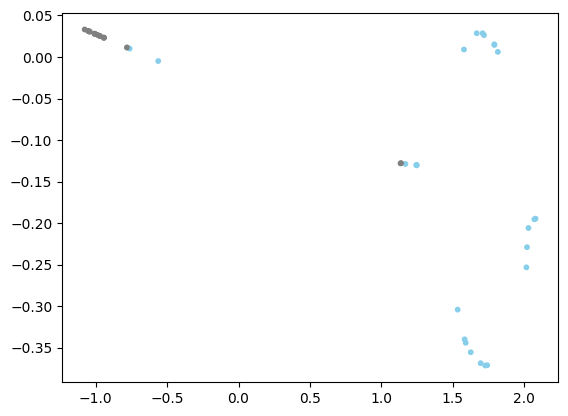

In [25]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [26]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 2
    for label in range(2):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [28]:
int_to_label={
    0: 'OD',
    1: 'NIO'
}


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [29]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


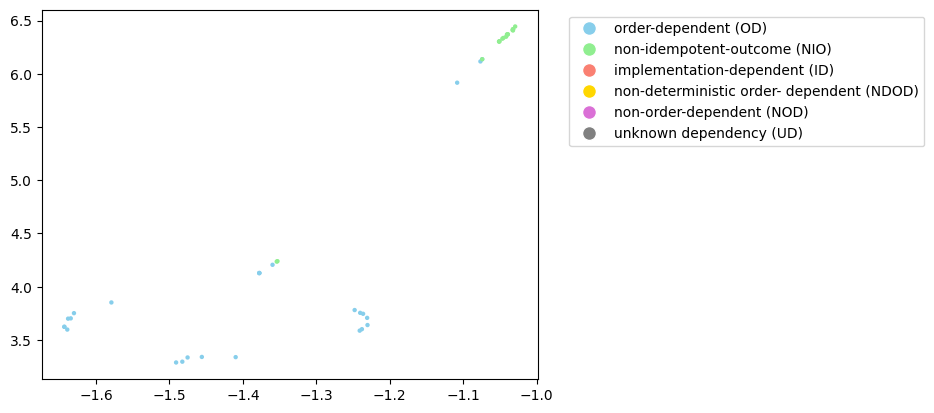

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


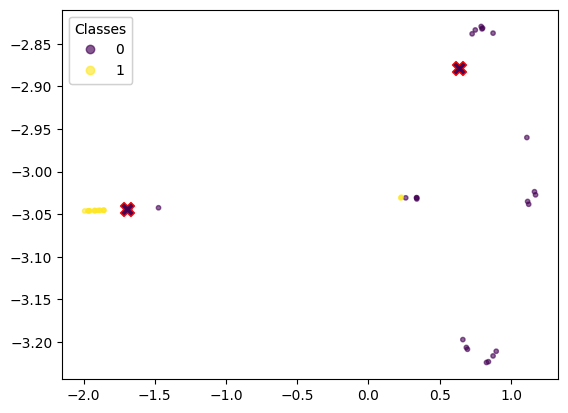

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [32]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [33]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 0 True: 0
2 Predicted: 0 True: 0
3 Predicted: 1 True: 1
4 Predicted: 0 True: 0
5 Predicted: 1 True: 0
6 Predicted: 0 True: 0
7 Predicted: 1 True: 1
8 Predicted: 1 True: 1
9 Predicted: 1 True: 0
10 Predicted: 1 True: 1
11 Predicted: 0 True: 0
Loop completed
F1 Score: 0.8212121212121214


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.67      1.00      0.80         4

    accuracy                           0.82        11
   macro avg       0.83      0.86      0.82        11
weighted avg       0.88      0.82      0.82        11


 - Accuracy :  0.82
 - Precision :  0.88
 - Recall :  0.82
 - F1 score :  0.82
 - MCC :  0.69
 - AUC :  0.86


Performances by categories



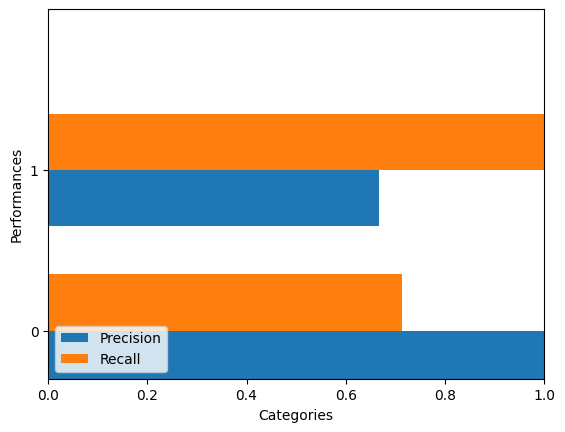



Confusion Matrix 


<AxesSubplot:>

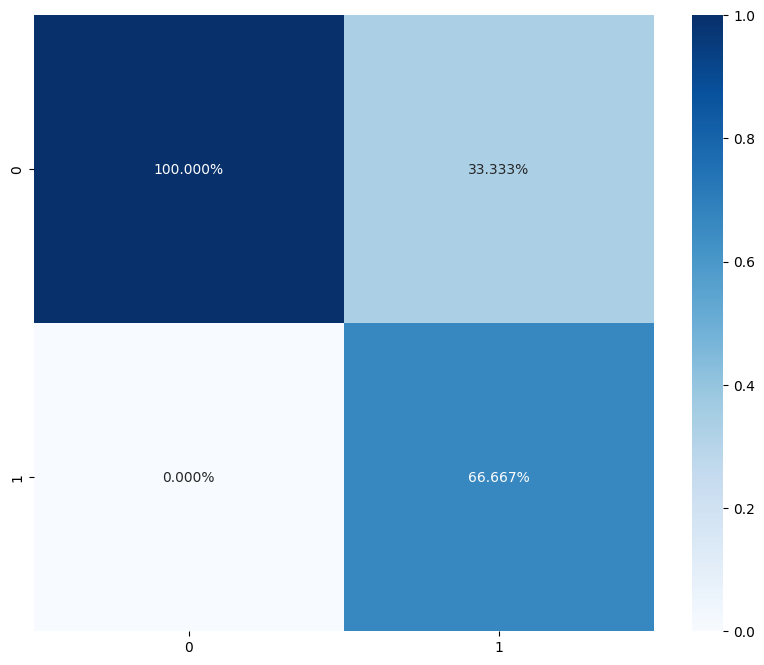

In [34]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


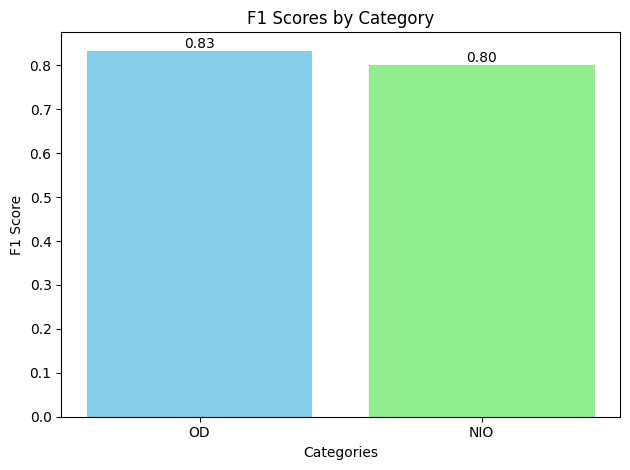

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [37]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [38]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [40]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [41]:
# print(len(projections), len(train_dataloader))

In [42]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [43]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")